In [1]:
%run 'Initialize Console.ipynb'

/home/ihs01/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
display(ChooseBox)

In [3]:
df = initConsole(table, dBase, new, df)

In [4]:
df['cp'] = (df['coilcsv_rms']/0.33) * df['coilv_rms']

In [ ]:
iSlidePlot(df)

In [ ]:
iJointPlot(df)

In [ ]:
customPlot(df, signal=('pidtca',),resample_rate_in_sec=120000,start=800000,end=1000000, fs=[10,7])

In [ ]:
ddTT = 1200
# customScatter(df, sig1='pha', sig2='rtc1a_mean', deltaTime=ddTT, start=2070000, end=len(df), fs=10)
customScatter(df, sig1='pha', sig2='rtc2a_mean', deltaTime=ddTT, start=2070000, end=len(df), fs=10)
# customScatter(df, sig1='pha', sig2='rtc3a_mean', deltaTime=ddTT, start=2070000, end=len(df), fs=10)
# customScatter(df, sig1='pha', sig2='rtc4a_mean', deltaTime=ddTT, start=2070000, end=len(df), fs=10)
# customScatter(df, sig1='pha', sig2='rtc5a_mean', deltaTime=ddTT, start=2070000, end=len(df), fs=10)

In [ ]:
def aaa(df, start=0):


#     sns.jointplot(a,b, kind="kde")
#     sns.jointplot(a,b).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
    
    g = sns.jointplot(data=df, x=out.columns[0], y=out.columns[1], kind="kde", size=6)
    g.plot_joint(plt.scatter, c='#4CB391')
    plt.xlabel(out.columns[0], fontsize=20)
    plt.ylabel(out.columns[1], fontsize=20)
    #plt.title('Joint Probability Density', fontsize=15 )
    plt.tick_params(axis="both", labelsize=15)
    plt.legend(fontsize=20)

    g.plot_marginals(sns.distplot, hist=True, kde=True)
    g.ax_joint.collections[0].set_alpha(0)
    a = df[out.columns[0]]
    b = df[out.columns[1]]
    g.x = a[start]
    g.y = b[start]
    g.plot_joint(plt.scatter, marker='o', c='r', s=100)
        

    
def bbb(df):
    if df.empty:
        print 'Null DataFrame'
    else:

        %matplotlib inline


        startWid = widgets.IntSlider(
        value=0,
        min=0,
        max=len(df),
        step=1,
        description='Start Sample', 
        continuous_update=False,
        )

         
    
        interact(aaa, df=fixed(df), 
             start=startWid, 
            __manual=False)

In [ ]:
bbb(out)

In [51]:
out = df.copy()
out = out.ix[2700000:].resample('60s')
out = out[['pha','rtc8a_mean']]

In [ ]:
import time
def ccc(df, start=0):

#     sns.jointplot(a,b, kind="kde")
#     sns.jointplot(a,b).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
    
    g = sns.jointplot(data=df, x=out.columns[0], y=out.columns[1], kind="kde", size=6)
    g.plot_joint(plt.scatter, c='#4CB391')
    plt.xlabel(out.columns[0], fontsize=20)
    plt.ylabel(out.columns[1], fontsize=20)
    #plt.title('Joint Probability Density', fontsize=15 )
    plt.tick_params(axis="both", labelsize=15)
    plt.legend(fontsize=20)

    g.plot_marginals(sns.distplot, hist=True, kde=True)
    g.ax_joint.collections[0].set_alpha(0)
    a = df[out.columns[0]]
    b = df[out.columns[1]]
    for val in np.arange(len(df)):
        g.x = a[val]
        g.y = b[val]
        g.plot_joint(plt.scatter, marker='o', c='r', s=100)
        fig.canvas.draw()
        #time.sleep(1)

ccc(out)

<IPython.core.display.Javascript object>


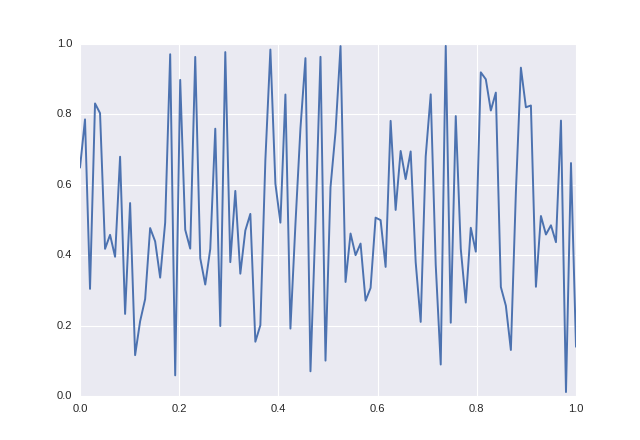

In [7]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax):
    x = np.linspace(0,1,100)
    y = np.random.random(size=(100,1))
    if len(ax.lines):
        ax.lines[0].set_xdata(x)
        ax.lines[0].set_ydata(y)
    else:
        ax.plot(x,y)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
for f in range(10):
    pltsin(ax)
    time.sleep(1)

<IPython.core.display.Javascript object>


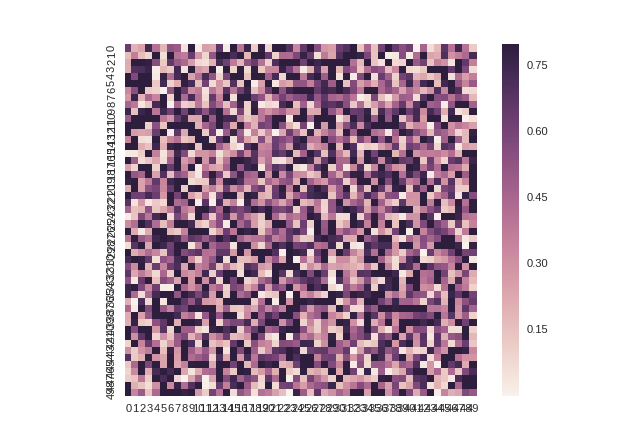

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

nx = 50
ny = 50

fig = plt.figure()
data = np.random.rand(nx, ny)
sns.heatmap(data, vmax=.8, square=True)

def init():
      sns.heatmap(np.zeros((nx, ny)), vmax=.8, square=True)

def animate(i):
    plt.clf()
    data = np.random.rand(nx, ny)
    sns.heatmap(data, vmax=.8, square=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat = False)

<IPython.core.display.Javascript object>


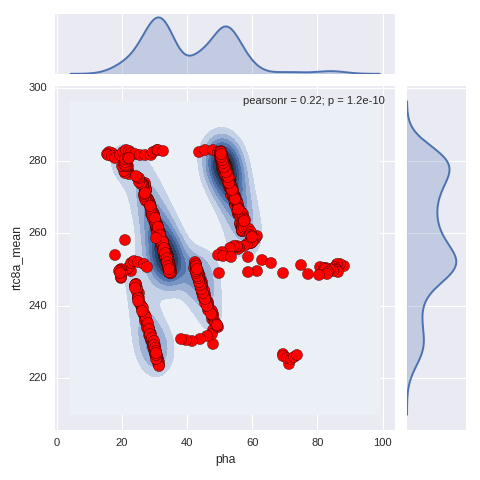

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


fig = sns.jointplot(data=out, x=out.columns[0], y=out.columns[1], kind="kde", size=6).plot_joint(plt.scatter, c='#4CB391')

a = out[out.columns[0]]
b = out[out.columns[1]]
def init():
    fig.x = a[0]
    fig.y = b[0]
    fig.plot_joint(plt.scatter)

def animate(i):
    fig.x = a[i]
    fig.y = b[i]
    fig.plot_joint(plt.scatter, marker='o', c='r', s=100)
    
anim = animation.FuncAnimation(fig.fig, animate, init_func=init, frames=1000, repeat = False)    


<IPython.core.display.Javascript object>


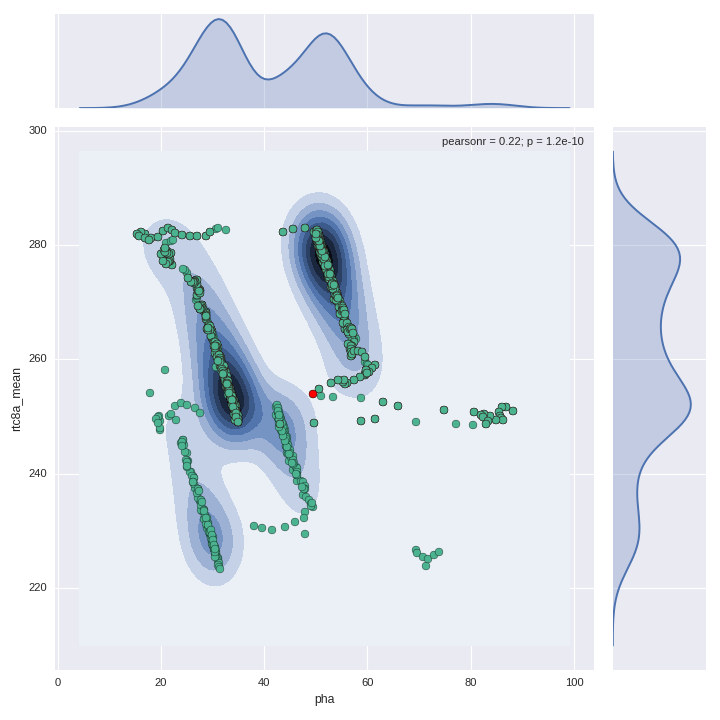

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


fig = sns.jointplot(data=out, x=out.columns[0], y=out.columns[1], kind="kde", size=9).plot_joint(plt.scatter, c='#4CB391', s=50)

a = out[out.columns[0]]
b = out[out.columns[1]]
def init():
    fig.x = a[0]
    fig.y = b[0]
    fig.plot_joint(plt.scatter, c='r', s=50)

def animate(i):
    fig.x = a[i-1]
    fig.y = b[i-1]
    fig.plot_joint(plt.scatter, c='#4CB391', s=50)
    fig.x = a[i]
    fig.y = b[i]
    fig.plot_joint(plt.scatter, c='r', s=50)
    
anim = animation.FuncAnimation(fig.fig, animate, init_func=init, frames=1000, repeat = False)    
